## 1.0 Import Function

In [5]:
from META_TOOLBOX import *
from VIGA_PREFABRICADA_PROTENDIDA import *

## 2.0 Setup 

In [6]:
N_REP = 10
N_ITER = 150
X_L = [0.20, 0.10, 0.10, 1/6.0]
X_U = [0.25, 0.15, 0.15, 1/3.5]
D = 4
M = 2
GAMMA = GAMMA_ASSEMBLY(X_L, X_U, D, M)
SETUP_FA = {
         'N_REP': N_REP,
         'N_ITER': N_ITER,
         'N_POP': 10,
         'D': D,
         'X_L': X_L,
         'X_U': X_U,
         'BETA_0': 0.98,
         'ALPHA_MIN': 0.25,
         'ALPHA_MAX': 1.00,
         'THETA': 0.95,
         'GAMMA': GAMMA,
         'NULL_DIC': None
        }

In [7]:
# OBJ. Function
def OF_FUNCTION(X, NULL_DIC):
    # Geometria da viga
    VIGA = {
        'H_W': X[0],
        'B_W': X[1],
        'B_FS': 0.30,
        'B_FI': 0.30,
        'H_FS': X[2],
        'H_FI': X[2],
        'H_SI': 0.07,
        'H_II': 0.07,
        'COB': 0.035,
        'PHI_L': 12.5 / 1E3,
        'A_BAR': 99 / 1000 ** 2,
        'PHI_E': 10.0 / 1E3,
        'L': 20,
        'L_PISTA': 150,
        'FATOR_SEC': 'I',
        'DELTA_ANC': 6 / 1E3,
        'TEMPO_CONC': [1.00, 15, 45, 50 * 365],
        'TEMPO_ACO': [2.00, 16, 46, 51 * 365],
        'TEMP': 20,
        'U': 70,
        'PERDA_INICIAL': 2.5,
        'PERDA_TEMPO': 17.50,
        'E_SCP': 200E6,
        'PHO_S': 78,
        'F_PK': 1900000,
        'F_YK': 1710000,
        'LAMBA_SIG': 1,
        'TIPO_FIO_CORD_BAR': 'COR',
        'TIPO_PROT': 'PRE',
        'TIPO_ACO': 'RB',
        'PHO_C': 25,
        'F_CK': 40 * 1E3,
        'CIMENTO': 'CP5',
        'AGREGADO': 'GRA',
        'ABAT': 0.09,
        'G_2K': 1.55 + 0.70,
        'Q_1K': 1.5,
        'PSI_1': 0.40,
        'PSI_2': 0.30,
        'GAMMA_F1': 1.30,
        'GAMMA_F2': 1.40,
        'GAMMA_S':1.15,
        'ETA_1':1.2,
        'ETA_2':1.0,
        'E_PPROPORCAO': X[3],
        'IMPRESSÃO': False
        }
    G, A_C, A_SCP = VERIFICACAO_VIGA(VIGA)
    PESO = VIGA['L'] * A_C *  VIGA['PHO_C']
    OF = PESO
    for I_CONT in range(len(G)):
        OF += (max(0, G[I_CONT]) ** 2) * 1E10
    return OF

## 4.0 Example

In [8]:
[RESULTS_REP, BEST_REP, AVERAGE_REP, WORST_REP, STATUS] = FA_ALGORITHM_0001(OF_FUNCTION, SETUP_FA)

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Process Time: 46.11 Seconds 
 Seconds per repetition: 4.61
META_FA001_REP_0_BEST_0_20210902 191532.xlsx
META_FA001_REP_1_BEST_1_20210902 191533.xlsx
META_FA001_REP_2_BEST_2_20210902 191533.xlsx
META_FA001_REP_3_BEST_3_20210902 191533.xlsx
META_FA001_REP_4_BEST_4_20210902 191533.xlsx
META_FA001_REP_5_BEST_5_20210902 191533.xlsx
META_FA001_REP_6_BEST_6_20210902 191533.xlsx
META_FA001_REP_7_BEST_7_20210902 191533.xlsx
META_FA001_REP_8_BEST_8_20210902 191533.xlsx
META_FA001_REP_9_BEST_9_20210902 191533.xlsx
META_FA001_RESUME_20210902 191533.xlsx


In [9]:
STATUS

array([4, 9, 2, 6, 3, 8, 1, 7, 0, 5], dtype=int64)

In [10]:
BEST_REP_ID = STATUS[0]
BEST_REP_ID

4

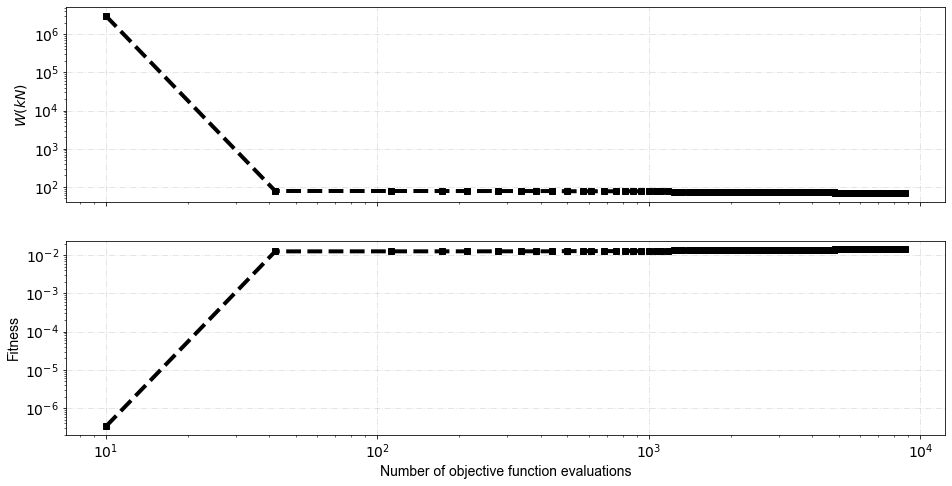

In [11]:
BEST = BEST_REP[BEST_REP_ID]
AVERAGE = AVERAGE_REP[BEST_REP_ID]
WORST = WORST_REP[BEST_REP_ID]
PLOT_SETUP = {
              'NAME': 'WANDER-OF',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'COLOR OF': '#000000',
              'MARKER OF': 's',
              'COLOR FIT': '#000000',
              'MARKER FIT': 's',
              'MARKER SIZE': 6,
              'LINE WIDTH': 4,
              'LINE STYLE': '--',
              'OF AXIS LABEL': '$W (kN) $',
              'X AXIS LABEL': 'Number of objective function evaluations',
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'AXISES COLOR': '#000000',
              'ON GRID?': True,
              'Y LOG': True,
              'X LOG': True,
             }
DATASET = {'X': BEST['NEOF'], 'OF': BEST['OF'], 'FIT': BEST['FIT']}
META_PLOT_001(DATASET, PLOT_SETUP)

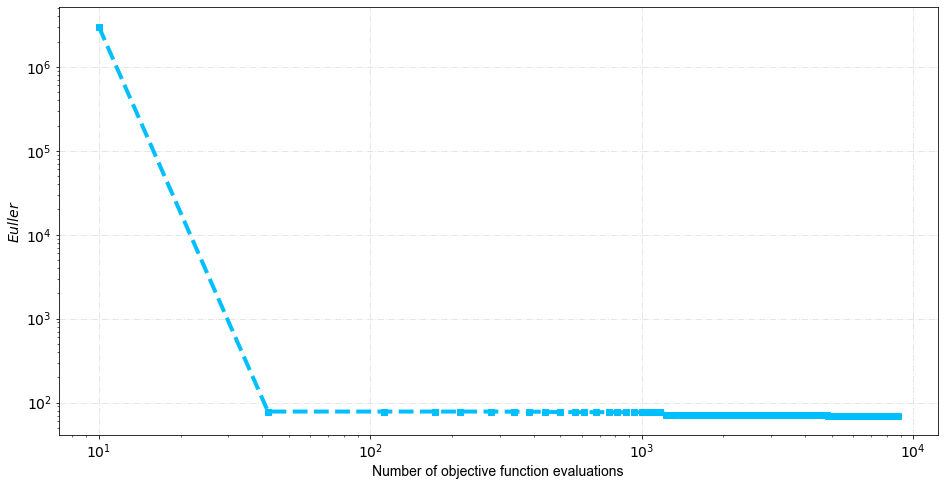

In [12]:
PLOT_SETUP = {
              'NAME': 'WANDER-OF',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'COLOR': '#00BFFF',
              'MARKER': 's',
              'MARKER SIZE': 6,
              'LINE WIDTH': 4,
              'LINE STYLE': '--',
              'Y AXIS LABEL': '$Euller$',
              'X AXIS LABEL': 'Number of objective function evaluations',
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'AXISES COLOR': '#000000',
              'ON GRID?': True,
              'Y LOG': True,
              'X LOG': True,
             }
DATASET = {'X': BEST['NEOF'], 'Y': BEST['OF']}
META_PLOT_002(DATASET, PLOT_SETUP)

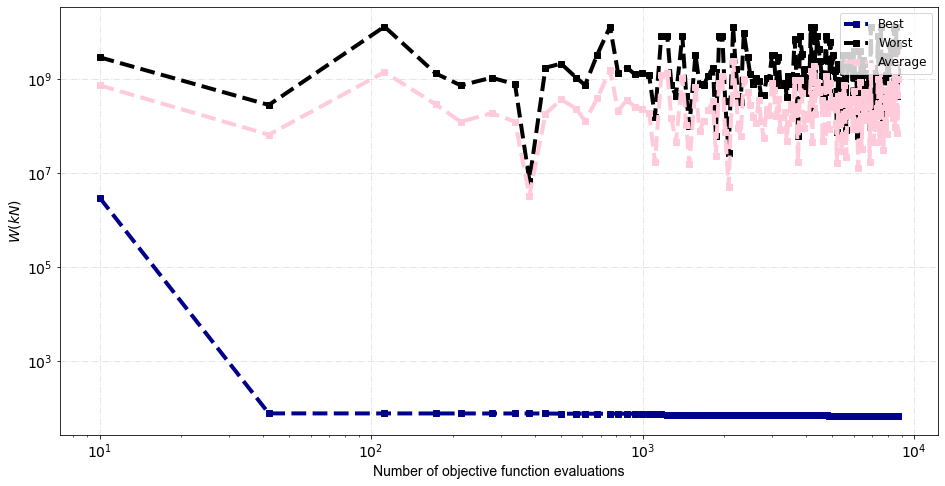

In [13]:
PLOT_SETUP = {
              'NAME': 'WANDER-OF',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'COLOR BEST': '#00008B',
              'COLOR WORST': '#000000',
              'COLOR AVERAGE': '#ffcbdb',
              'MARKER': 's',
              'MARKER SIZE': 6,
              'LINE WIDTH': 4,
              'LINE STYLE': '--',
              'Y AXIS LABEL': '$W (kN) $',
              'X AXIS LABEL': 'Number of objective function evaluations',
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'AXISES COLOR': '#000000',
              'ON GRID?': True,
              'LOC LEGEND': 'upper right',
              'SIZE LEGEND': 12,
              'Y LOG': True,
              'X LOG': True
             }
DATASET = {'X': BEST['NEOF'], 'BEST': BEST['OF'], 'AVERAGE': AVERAGE['OF'], 'WORST': WORST['OF']}
META_PLOT_003(DATASET, PLOT_SETUP)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


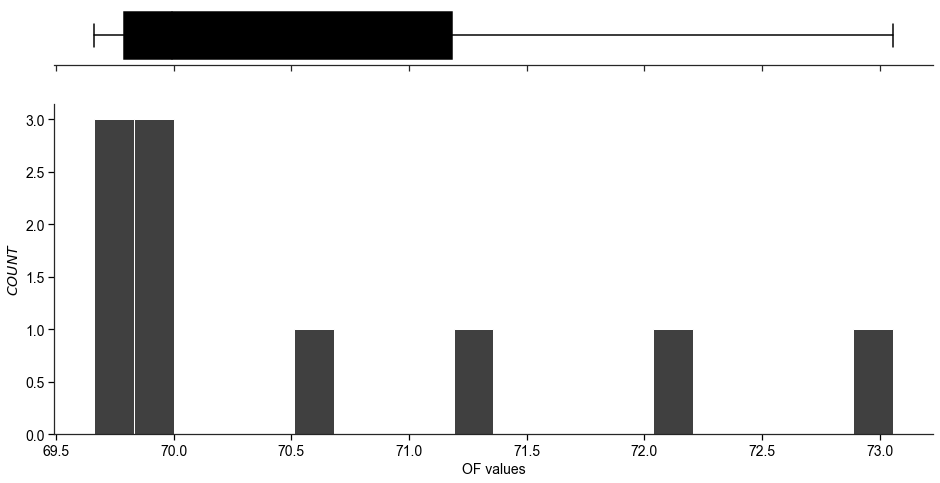

In [14]:
PLOT_SETUP = {
              'NAME': 'WANDER-OF',
              'WIDTH': 0.40, 
              'HEIGHT': 0.20,
              'DPI': 600, 
              'EXTENSION': '.svg',
              'MARKER': 's',
              'X AXIS LABEL': 'OF values',
              'X AXIS SIZE': 14,
              'Y AXIS SIZE': 14,
              'LABELS SIZE': 14,
              'LABELS COLOR': '#000000',
              'COLOR': '#000000',
              'AXISES COLOR': '#000000',
              'BINS': 20,
              'KDE': False,
             }
DATASET = {'NUMBER OF REPETITIONS': N_REP, 'NUMBER OF ITERATIONS': N_ITER, 'OF OR FIT': 'OF', 'BEST': BEST_REP}
META_PLOT_004(DATASET, PLOT_SETUP)

In [16]:
BEST_REP[BEST_REP_ID]

{'X_POSITION': array([[0.24156511, 0.11778267, 0.13758322, 0.23886696],
        [0.23196117, 0.15      , 0.15      , 0.28571429],
        [0.23196117, 0.15      , 0.15      , 0.28571429],
        [0.23196117, 0.15      , 0.15      , 0.28571429],
        [0.23196117, 0.15      , 0.15      , 0.28571429],
        [0.23196117, 0.15      , 0.15      , 0.28571429],
        [0.22736509, 0.15      , 0.15      , 0.28571429],
        [0.22736509, 0.15      , 0.15      , 0.28571429],
        [0.22736509, 0.15      , 0.15      , 0.28571429],
        [0.25      , 0.13415921, 0.15      , 0.28571429],
        [0.25      , 0.13415921, 0.15      , 0.28571429],
        [0.25      , 0.13415921, 0.15      , 0.28571429],
        [0.25      , 0.13415921, 0.15      , 0.28571429],
        [0.25      , 0.13415921, 0.15      , 0.28571429],
        [0.25      , 0.13285473, 0.15      , 0.2842692 ],
        [0.25      , 0.13285473, 0.15      , 0.2842692 ],
        [0.25      , 0.13285473, 0.15      , 0.2842692 ],


In [20]:
X = BEST_REP[BEST_REP_ID]['X_POSITION'][N_ITER, :]

In [21]:
VIGA = {
    'H_W': X[0],
    'B_W': X[1],
    'B_FS': 0.30,
    'B_FI': 0.30,
    'H_FS': X[2],
    'H_FI': X[2],
    'H_SI': 0.07,
    'H_II': 0.07,
    'COB': 0.035,
    'PHI_L': 12.5 / 1E3,
    'A_BAR': 99 / 1000 ** 2,
    'PHI_E': 10.0 / 1E3,
    'L': 20,
    'L_PISTA': 150,
    'FATOR_SEC': 'I',
    'DELTA_ANC': 6 / 1E3,
    'TEMPO_CONC': [1.00, 15, 45, 50 * 365],
    'TEMPO_ACO': [2.00, 16, 46, 51 * 365],
    'TEMP': 20,
    'U': 70,
    'PERDA_INICIAL': 2.5,
    'PERDA_TEMPO': 17.50,
    'E_SCP': 200E6,
    'PHO_S': 78,
    'F_PK': 1900000,
    'F_YK': 1710000,
    'LAMBA_SIG': 1,
    'TIPO_FIO_CORD_BAR': 'COR',
    'TIPO_PROT': 'PRE',
    'TIPO_ACO': 'RB',
    'PHO_C': 25,
    'F_CK': 40 * 1E3,
    'CIMENTO': 'CP5',
    'AGREGADO': 'GRA',
    'ABAT': 0.09,
    'G_2K': 1.55 + 0.70,
    'Q_1K': 1.5,
    'PSI_1': 0.40,
    'PSI_2': 0.30,
    'GAMMA_F1': 1.30,
    'GAMMA_F2': 1.40,
    'GAMMA_S':1.15,
    'ETA_1':1.2,
    'ETA_2':1.0,
    'E_PPROPORCAO': X[3],
    'IMPRESSÃO': False
    }
G, A_C, A_SCP = VERIFICACAO_VIGA(VIGA)
PESO = VIGA['L'] * A_C *  VIGA['PHO_C']
OF = PESO

In [22]:
OF

69.66131356444781

In [23]:
G

[-0.0027720612985147053,
 -0.9517217169060872,
 -0.46367684066130077,
 -0.490816937543301,
 -0.001793060650170153,
 -0.6939407186734647]